# 548 20sp exam2 due 5p Fri Jun 5 on Canvas

***Please carefully review and compare this solution with your exam writeup.***
- I will accept regrade requests until midnight Sun Jun 14.
- To request a regrade, send one message to Prof Burden using [Canvas Conversations](https://canvas.uw.edu/conversations) specifying all of the problems you want regraded and your reason for requesting the regrade.
- ***Note that it is possible that a regrade request will result in a decrease in your exam score***, so be sure you understand the solution provided before making a request.

7.0 <= scores <= 8.0
median score = 8.0


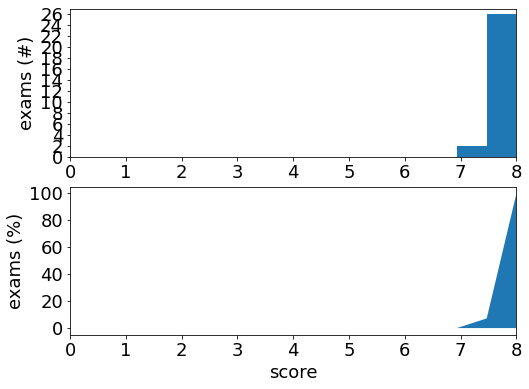

In [ ]:
import numpy as np
import pylab as plt

scores = np.array([7. , 7. , 7.5, 7.5, 7.5, 7.5, 7.5, 7.5, 8. , 8. , 8. , 8. , 8. ,
                   8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. , 8. ,
                   8. , 8.])

print('%0.1f <= scores <= %0.1f'%(scores.min(),scores.max()))
print('median score = %0.1f'%np.median(scores))

xlim = (0,8)
dxlim = xlim[1] - xlim[0]

plt.figure(figsize=(8,6))
plt.subplot(2,1,1)
h = plt.hist(scores,bins=np.linspace(xlim[0],xlim[1],2*dxlim))
n,s = h[0],h[1]
N = int(np.ceil(h[0].max()))
plt.ylim(0,N+1)
plt.xticks(np.linspace(xlim[0],xlim[1],dxlim+1))
plt.yticks(np.linspace(0,N,(N+2)//2))
plt.xlim(xlim)
plt.ylabel('exams (#)');

plt.subplot(2,1,2)
n *= 100./n.sum()
n = np.hstack((0.,n))
plt.fill_between(s,np.cumsum(n),0*n)
plt.xlim(xlim)
plt.xticks(np.linspace(xlim[0],xlim[1],dxlim+1))
plt.yticks(np.linspace(0,100,6))
plt.xlabel('score'); plt.ylabel('exams (%)');

# setup

In [ ]:
# "magic" commands, prefaced with "%", changes settings in the notebook

# this ensures plots are embedded in notebook web page
%matplotlib inline

# pdb = Python debugger, so this command turns the debugger OFF
%pdb off

Automatic pdb calling has been turned OFF


In [ ]:
# numpy = numerical Python, implements arrays (/ matrices)
import numpy as np
# limit number of decimal places printed for floating-point numbers
np.set_printoptions(precision=3)

# scipy = scientific Python, implements operations on arrays / matrices
import scipy as sp
# linalg = linear algebra, implements eigenvalues, matrix inverse, etc
from scipy import linalg as la
# optimize = optimization, root finding, etc
from scipy import optimize as op

# produce matlab-style plots
import matplotlib as mpl
# increase font size on plots
mpl.rc('font',**{'size':18})
# use LaTeX to render symbols
mpl.rc('text',usetex=False)
# animation
from matplotlib import animation as animation
from IPython.display import HTML
mpl.rc('animation', html='jshtml')
# Matlab-style plotting
import matplotlib.pyplot as plt

# symbolic computation, i.e. computer algebra (like Mathematica, Wolfram Alpha)
import sympy as sym


In [ ]:
# os = operating system; access OS-level commands
# e.g. create directory, delete file, execute command
# (more platform-independent than "!")
import os

In [ ]:
# test whether this is a Colaboratory or Jupyter notebook
try:
  import google.colab
  COLAB = True
  print('Colaboratory Notebook')
except:
  COLAB = False
  print('Jupyter Notebook')

Colaboratory Notebook


In [ ]:
# Colab notebook
if COLAB:
  # pip = Python package manager; "!" means "run at system level"
  !pip install slycot
  !pip install control
  
  # render SymPy equations nicely in Colaboratory Notebook
  def colab_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
    javascript(url=url)
    return sym.printing.latex(exp,**options)
  
  sym.init_printing(use_latex="mathjax",latex_printer=colab_latex_printer)

# Jupyter notebook
else:
  init_printing(use_latex='mathjax')

# Python's Control Systems Toolbox
import control as ctrl

# SciPy module that implements many of the routines in ctrl
from scipy import signal as sig

     |████████████████████████████████| 1.6MB 8.3MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for slycot: filename=slycot-0.4.0-cp36-cp36m-linux_x86_64.whl size=1413144 sha256=93629c6f04732f23636ec1a42c57b2fe8a117e3c950682446fa14e39c1fdd8ca
  Stored in directory: /root/.cache/pip/wheels/a2/46/56/f82cbb2fd06556f4f3952a2eb2396e8fd29264fffecbaad3cf
Successfully built slycot
     |████████████████████████████████| 256kB 8.3MB/s 
  Created wheel for control: filename=control-0.8.3-py2.py3-none-any.whl size=260982 sha256=c15a9250499510db8287ea81f986b30e29b4b4145f5fcb505030c6c8767deb89
  Stored in directory: /root/.cache/pip/wheels/c2/d9/cc/90b28cb139a6320a3af2285428b6da87eee8d8920c78bb0223
Successfully built control


# problem (1) robustness of pole placement

***Purpose:*** *revisit Problem 1 from Homework 2 to assess robustness properties of a pole-placement controller for a SISO system.*

Consider a PI controller applied to a stable first-order process ($a > 0$) in the following block diagram:

$$ P(s) = \frac{b}{s + a},\ C(s) = k_P + \frac{k_I}{s}. $$

![control system with two degrees-of-freedom](https://raw.githubusercontent.com/sburden/548-20sp/master/feedback-2dof.png)



**Assume $F = 1$ in all parts of this problem.**

## problem (1a)

(a) *Determine state-space realizations for $P$ and $C$ (i.e. $A_P,B_P,C_P,D_P$ matrices so that $P(s) = C_P(sI - A_P)^{-1} B_P + D_P$, and similarly for $C(s)$); the state should be $1$-dimensional in both realizations.*

In [ ]:
import sympy as sym

s,a,b,k_P,k_I = sym.var('s a b k_P k_I')

A_P = -a; B_P = b; C_P = 1; D_P = 0
Ps = C_P * (s - A_P)**(-1) * B_P + D_P
print('P(s) =',Ps)

A_C = 0; B_C = k_I; C_C = 1; D_C = k_P
Cs = C_C * (s - A_C)**(-1) * B_C + D_C
print('C(s) =',Cs)

P(s) = b/(a + s)
C(s) = k_I/s + k_P


## problem (1b)

(b) *Determine a state-space realization for $T_{yr}$; the state should be $2$-dimensional.*

In [ ]:
A = sym.Matrix([[-a - b*k_P,b],[-k_I,0]])
B = sym.Matrix([[b * k_P],[k_I]])
C = sym.Matrix([[1,0]])
D = sym.Matrix([[0]])

A = sym.Matrix([[0,1],[-b*k_I,-(a+b*k_P)]])
B = sym.Matrix([[0],[1]])
C = sym.Matrix([[b*k_I,b*k_P]])
D = sym.Matrix([[0]])

I = sym.eye(2)

T_yr = sym.simplify(C * sym.Matrix.inv(s*I - A) * B + D)[0,0]
T_yr_ = sym.simplify(Ps*Cs / (1 + Ps*Cs))

# verify state-space realization 
assert(sym.simplify(T_yr - T_yr_) == 0)

print('T_yr(s) =',T_yr)

T_yr(s) = b*(k_I + k_P*s)/(b*k_I + s*(a + b*k_P + s))


**Assume $a,b = 1$ in the remaining problems.**

Recall the values of $k_{I}$ and $k_{P}$ that place both closed-loop poles at $-p$:
$$k_{I} =   \frac{p^{2}}{b},\ k_{P} = \frac{1}{b} \left(2 p - a \right).$$



## problem (1c)

(c) *Plot the $H_2$ norm of the closed-loop transformation $T_{yr}$ as a function of the pole location $-p\in(-\infty,0]$.*



H_2 norm ||T_yr|| = sqrt((p**2 + (2*p - 1)**2)/p)/2


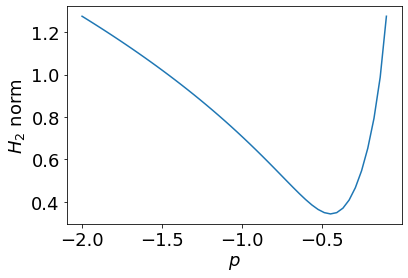

In [ ]:
L_11,L_12,L_22 = sym.var('L_11 L_12 L_22')
L = sym.Matrix([[L_11,L_12],[L_12,L_22]])
# solve Lyapunov equation to find controllability Grammian
L_C = L.subs(sym.solve(A*L + L*A.T + B*B.T,L))
assert(sym.simplify(A*L_C + L_C*A.T + B*B.T) == sym.Matrix.zeros(2,2))
# solve Lyapunov equation to find observability Grammian
L_O = L.subs(sym.solve(A.T*L + L*A + C.T*C,L))
assert(sym.simplify(A.T*L_O + L_O*A + C.T*C) == sym.Matrix.zeros(2,2))
# verify both Grammians give the same H_2 norm
assert(sym.simplify(sym.Matrix.trace(C*L_C*C.T)) == sym.simplify(sym.Matrix.trace(B.T*L_O*B)))

p = sym.var('p')

pars = {k_I:p**2/b, k_P:(2*p-a)/b, a:1, b:1}

H2 = sym.sqrt(sym.simplify(sym.Matrix.trace(C*L_C*C.T).subs(pars).subs(pars)))

print('H_2 norm ||T_yr|| =',H2)


#sym.plot(H2,xlim=[0,2],xlabel=r'$p$',ylabel=r'$H_2$ norm')

H2_ = sym.lambdify(p,H2)
import pylab as plt
P = np.linspace(1e-1,2.)
plt.plot(-P,H2_(P));
plt.xlabel(r'$p$')
plt.ylabel(r'$H_2$ norm');

## problem (1d)

(d) *Plot the $H_\infty$ norm of the closed-loop transformation $T_{yr}$ as a function of the pole location $-p\in(-\infty,0]$.*

In [ ]:
g = sym.var('g')

Hg = sym.Matrix.vstack(sym.Matrix.hstack(A,B*B.T/g**2),
                       sym.Matrix.hstack(-C.T*C,-A.T)).subs(pars).subs(pars)

H = sym.lambdify((g,p),Hg)

In [ ]:
import numpy as np

P = np.logspace(-2,np.log10(2),num=100)
G = np.logspace(-2,+2,num=10**3)

Hoo = []
for p in P:
  E = []
  for g in G:
    E.append(np.linalg.eigvals(H(g,p)))
  E = np.asarray(E)

  Hoo.append(G[(np.abs(E.real).min(axis=1) < 1e-6).nonzero()[0][-1]])
  #Hoo.append(G[(np.abs(E.real).min(axis=1) > 1e-6).nonzero()[0][0]])
Hoo = np.asarray(Hoo)

Text(0, 0.5, '$H_\\infty$ norm')

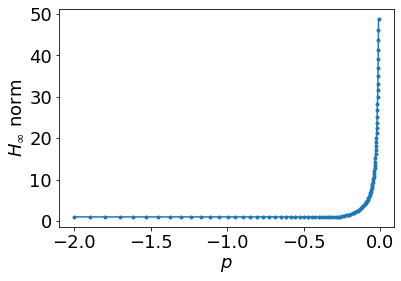

In [ ]:
import pylab as plt

plt.figure()
plt.plot(-P,Hoo,'.-');
plt.xlabel(r'$p$')
plt.ylabel(r'$H_\infty$ norm')

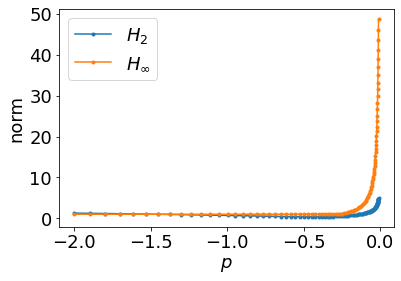

In [ ]:
plt.figure()
plt.plot(-P,H2_(P),'.-',label=r'$H_2$');
plt.plot(-P,Hoo,'.-',label=r'$H_\infty$');
plt.xlabel(r'$p$')
plt.ylabel(r'norm')
plt.legend()

# problem (2) optimal controller synthesis

Consider the dynamics of the simple harmonic oscillator (spring-mass-damper),

$$ m\ddot{q} = - k q - b \dot{q} + u + \mu,\ y = q + \eta,\ w = (\mu,\eta),\ z = (q,u).$$



## problem (2a)

(a) *Regarding this LTI system as a process $P$ with inputs $w,u$ and outputs $z,y$ with state $x = (q,\dot{q})$, determine the system matrices for the following state-space representation of $P$:*

$$
\dot{x} = A x + B_1 w + B_2 u,\\
z = C_1 x + D_{11} w + D_{12} u,\\
y = C_2 x + D_{21} w + D_{22} u.
$$

$$
A = \left[ \begin{array}{cc} 0 & 1 \\ -\frac{k}{m} & -\frac{b}{m} \end{array} \right],\
B_1 = \left[ \begin{array}{cc} 0 & 0 \\ \frac{1}{m} & 0 \end{array} \right],\
B_2 = \left[ \begin{array}{c} 0 \\ \frac{1}{m} \end{array} \right],
$$

$$
C_1 = \left[ \begin{array}{cc} 1 & 0 \\ 0 & 0 \end{array} \right],\
D_{11} = 0,\
D_{12} = \left[ \begin{array}{c} 0 \\ 1 \end{array} \right],
$$

$$
C_2 = \left[ \begin{array}{cc} 1 & 0 \end{array} \right],\
D_{21} = \left[ \begin{array}{cc} 0 & 1 \end{array} \right],\
D_{22} = 0.
$$

**Assume $m = k = b = 1$ and in the remaining problems.**



## problem (2b)

(b) *Use `control.h2syn`, i.e. the $H_2$ controller synthesis routine from the Control Systems Toolbox, to determine a dynamic compensator for $P$ that minimizes the $H_2$ norm of the closed-loop transformation from $w$ to $z$; provide a state-space realization of the compensator.*

***Hint:*** use the following arguments to `h2syn`: `P = ctrl.ss(A,B,C,D)`, `nmeas = 1`, `ncont = 1` where

$$
B = \left[ \begin{array}{c} B_1 \\ B_2 \end{array} \right],\
C = \left[ \begin{array}{cc} C_1 \\ C_2 \end{array} \right],\
D = \left[ \begin{array}{cc} D_{11} & D_{12} \\ D_{21} & D_{22} \end{array} \right].
$$



In [ ]:
import control as ctrl

m = 1; k = 1; b = 1

# dx = A x + B1 w + B2 u
A = np.array([[0,1],[-k/m,-b/m]])
B1 = np.array([[0,0],[1/m,0]])
B2 = np.array([[0],[1/m]])
# z = C1 x + D11 w + D12 u
C1 = np.array([[1,0],[0,0]])
D11 = np.zeros((2,2))
D12 = np.array([[0],[1]])
# y = C2 x + D21 w + D22 u
C2 = np.array([[1,0]])
D21 = np.array([[0,1]])
D22 = np.zeros((1,1))

# check shapes
P_zw = ctrl.ss(A,B1,C1,D11)
P_zu = ctrl.ss(A,B2,C1,D12)
P_yw = ctrl.ss(A,B1,C2,D21)
P_yu = ctrl.ss(A,B2,C2,D22)

# assemble overall P
B = np.hstack((B1,B2))
C = np.vstack((C1,C2))
D1 = np.hstack((D11,D12))
D2 = np.hstack((D21,D22))
D = np.vstack(( D1, D2 ))

P = ctrl.ss(A,B,C,D)

nmeas = 1; ncont = 1;
C_H2 = ctrl.h2syn(P,nmeas,ncont)
print('C_H2:\n',C_H2)

C_H2:
 A = [[-0.352  1.   ]
 [-1.476 -1.352]]

B = [[0.352]
 [0.062]]

C = [[-0.414 -0.352]]

D = [[0.]]



## problem (2c)

(c) *Verify that your answer in (b) agrees with the continuous-time infinite-horizon LQG = LQ + KF regulator when the LQ weighting matrices are $Q = C_1^\top C_1$, $R = 1$ and the KF weighting matrices are $W = B_1 B_1^\top$, $V = 1$.*

In [ ]:
Q = np.dot(C1.T,C1)
R = np.eye(1)

W = np.dot(B1,B1.T)
V = np.eye(1)

K = ctrl.lqr(A,B2,Q,R)[0]
L = ctrl.lqr(A.T,C2.T,W,V)[0].T

assert(np.allclose(-K,C_H2.C))
assert(np.allclose(L,C_H2.B))

## problem (2d)

(d) *Use `control.hinfsyn`, i.e. the $H_\infty$ controller synthesis routine from the Control Systems Toolbox, to determine a dynamic compensator for $P$ that minimizes the $H_\infty$ norm of the closed-loop transformation from $w$ to $z$; provide a state-space realization of the compensator.*

In [ ]:
C_Hoo,T,gamma,_ = ctrl.hinfsyn(P,nmeas,ncont)
print('C_Hoo:\n',C_Hoo)
print('gamma =',gamma)

C_Hoo:
 A = [[ 1.898e-01  1.000e+00]
 [-5.997e+07 -3.898e+07]]

B = [[ 0.604]
 [-0.057]]

C = [[-59970994.171 -38983647.938]]

D = [[0.]]

gamma = 0.8723436121734119
